In [1]:
using DrWatson; quickactivate("..")

  Activating project at `~/workspace/Postdoc/UncertaintyModel`


In [110]:
include("../src/model.jl")

select_parents

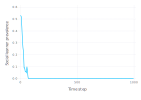

In [137]:
steps_per_round = 5

model = uncertainty_learning_model(;
    steps_per_round = steps_per_round, 
    env_uncertainty = 1.0, nteachers=5); 

adata = [(:behavior, countmap), (:social_learner, mean), 
         (:net_payoff, sum)]
mdata = [(:optimal_behavior), (:tick)]

adf, mdf = run!(model, agent_step!, model_step!, 1000; 
    adata = adata, mdata = mdata, 
    when = (model, step) -> 
        ( (step - 1) % steps_per_round == 0  ||  step == 0 ) );


plot(x=adf.step, y = adf.mean_social_learner, 
    Guide.xlabel("Time step"), 
    Guide.ylabel("Social learner prevalence"), 
    Geom.line, Theme(line_width=1.5pt))

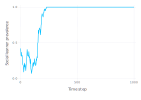

In [51]:
steps_per_round = 3

model = uncertainty_learning_model(;
    steps_per_round = steps_per_round, 
    env_uncertainty = 0.45, nteachers=5); 

adata = [(:behavior, countmap), (:social_learner, mean), 
         (:net_payoff, sum)]
mdata = [(:optimal_behavior), (:tick)]

adf, mdf = run!(model, agent_step!, model_step!, 1000; 
    adata = adata, mdata = mdata, 
    when = (model, step) -> 
        ( (step - 1) % steps_per_round == 0  ||  step == 0 ) );

plot(x=adf.step, y = adf.mean_social_learner, 
    Guide.xlabel("Time step"), 
    Guide.ylabel("Social learner prevalence"), 
    Geom.line, Theme(line_width=1.5pt))

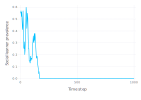

In [56]:
steps_per_round = 3

model = uncertainty_learning_model(;
    steps_per_round = steps_per_round, 
    env_uncertainty = 0.55, nteachers=5); 

adata = [(:behavior, countmap), (:social_learner, mean), 
         (:net_payoff, sum)]
mdata = [(:optimal_behavior), (:tick)]

adf, mdf = run!(model, agent_step!, model_step!, 1000; 
    adata = adata, mdata = mdata, 
    when = (model, step) -> 
        ( (step - 1) % steps_per_round == 0  ||  step == 0 ) );

plot(x=adf.step, y = adf.mean_social_learner, 
    Guide.xlabel("Time step"), 
    Guide.ylabel("Social learner prevalence"), 
    Geom.line, Theme(line_width=1.5pt))

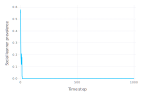

In [61]:
steps_per_round = 1

model = uncertainty_learning_model(;
    steps_per_round = steps_per_round, 
    env_uncertainty = 0.9, nteachers=5); 

adata = [(:behavior, countmap), (:social_learner, mean), 
         (:net_payoff, sum)]
mdata = [(:optimal_behavior), (:tick)]

adf, mdf = run!(model, agent_step!, model_step!, 1000; 
    adata = adata, mdata = mdata, 
    when = (model, step) -> 
        ( (step - 1) % steps_per_round == 0  ||  step == 0 ) );

plot(x=adf.step, y = adf.mean_social_learner, 
    Guide.xlabel("Time step"), 
    Guide.ylabel("Social learner prevalence"), 
    Geom.line, Theme(line_width=1.5pt),
)

## Analysis of experiment data

In [62]:
using JLD2
using DataFrames

In [69]:
res = load("../newmodel_test.jld2")["res"];

In [185]:
maximum(res.step)

# endtimesdf = filter(r -> (r.step == 999) && (r.low_payoff == 0.25)
#                     && (r.steps_per_round == 4), res);

endtimesdf = filter(r -> (r.step == 999) && (r.low_payoff == 0.25), res);
# first(endtimesdf, 10)

In [186]:
groupbydf = groupby(endtimesdf, [:env_uncertainty, :steps_per_round]);

In [187]:
cdf = combine(groupbydf, :mean_social_learner => mean)
cdf.steps_per_round = string.(cdf.steps_per_round)
# mean(groupbydf[1].mean_social_learner)

21-element Vector{String}:
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"
 "1"
 "2"
 "4"

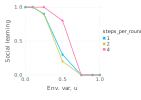

In [188]:
using Gadfly
PROJECT_THEME = Theme(
    point_size=3.5pt, major_label_font_size = 16pt, 
    minor_label_font_size = 14pt, key_title_font_size=14pt, 
    line_width = 2pt, key_label_font_size=14pt
)
env_unc = [0., .1, .25, .5, .75, .9, 1.0]
plot(cdf, x=:env_uncertainty, y=:mean_social_learner_mean, 
    color = :steps_per_round, Geom.line, Geom.point,
    Theme(line_width=1.5pt), Guide.xlabel("Env. var, u"), 
    Guide.ylabel("Social learning"), PROJECT_THEME)

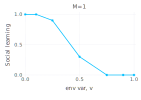

In [164]:
using Gadfly
PROJECT_THEME = Theme(
    point_size=3.5pt, major_label_font_size = 16pt, 
    minor_label_font_size = 14pt, key_title_font_size=14pt, 
    line_width = 2pt, key_label_font_size=14pt
)
env_unc = [0., .1, .25, .5, .75, .9, 1.0]
plot(x=env_unc, y=unc_res_M1, Geom.line, Geom.point,
    Theme(line_width=1.5pt), Guide.title("M=1"), Guide.xlabel("env var, v"), 
    Guide.ylabel("Social learning"), PROJECT_THEME)

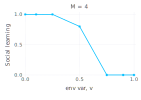

In [165]:
plot(x=env_unc, y=unc_res, Geom.line, Geom.point,
    Theme(line_width=1.5pt), Guide.title("M = 4"), Guide.xlabel("env var, v"), 
    Guide.ylabel("Social learning"),PROJECT_THEME)

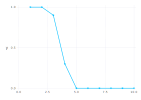

In [145]:
plot(y=unc_res, Geom.line, Geom.point,
    Theme(line_width=1.5pt))

In [85]:
comb = combine(groupbydf, 
    [:mean_social_learner] => 
        (
    (mean_social_learner) -> (mean_social_learner = mean(mean_social_learner))
    ) => AsTable
)


LoadError: ArgumentError: 'Float64' iterates 'Float64' values, which doesn't satisfy the Tables.jl `AbstractRow` interface